In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r"\Users\lenovo\Documents\Analizy excel\Orlen.xlsx")
time = df['time'] ; year = ('2015' , '2016','2017','2018','2019','2020')

In [3]:
class ZIS:
    def __init__(self , time):
        self.time = time 
        self.year = year 
        self.shares = df['shares']
        self.sell_revenue = df['sell revenue']
        self.production_costs = df['production cost']
        self.sell_costs = df['sell cost']
        self.board_costs = df['board cost']
        self.sell_profit = df['sell profit']
        self.gross_profit = df['brutto profit']
        self.net_profit = df['net profit'].astype('float64')
        self.net_profit_share = self.net_profit/self.shares*1000
        self.net_profit_share_year = [ np.sum(self.net_profit_share[i:i+4]) for i in range(0,len(self.net_profit_share),4) ]
        self.Revenue_year = [np.sum(self.sell_revenue[i:i+4])/1000000 for i in range(0,len(self.net_profit_share),4)] 
        
        self.Revenue_1Q = [ self.sell_revenue[i] for i in range(0,len(self.shares),4)]
        self.Revenue_2Q = [ self.sell_revenue[i] for i in range(1,len(self.shares),4)]
        self.Revenue_3Q = [ self.sell_revenue[i] for i in range(2,len(self.shares),4)]
        self.Revenue_4Q = [ self.sell_revenue[i] for i in range(3,len(self.shares),4)]
        
        self.gross_profit_1Q = [ self.gross_profit[i] for i in range(0,len(self.shares),4)]
        self.gross_profit_2Q = [ self.gross_profit[i] for i in range(1,len(self.shares),4)]
        self.gross_profit_3Q = [ self.gross_profit[i] for i in range(2,len(self.shares),4)]
        self.gross_profit_4Q = [ self.gross_profit[i] for i in range(3,len(self.shares),4)]

    def Revenue(self):
        self.fig = plt.figure(figsize = (20,8) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time , self.sell_revenue/self.shares*1000 , label = 'sell_revenue' )
        plt.plot(self.time , self.production_costs/self.shares*1000 , label = 'production_costs', color ='saddlebrown')
        plt.plot(self.time , self.sell_costs/self.shares*1000 , label = 'sell_costs', color='crimson')
        plt.plot(self.time , self.board_costs/self.shares*1000 , label = 'board_costs', color='limegreen')
        
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        self.ax.legend(loc = 'best' , fontsize = 12)
        
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylabel('Sell revenue/production costs', fontsize=15)
        plt.bar(self.time, self.sell_revenue/self.production_costs)
        plt.xticks(rotation = 50)
        
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_ylabel('mld zł')
        plt.bar(self.year, self.Revenue_year)
        
        self.fig = plt.figure(figsize = (15,8) , dpi=80)
        self.ax = plt.subplot(221)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(0,len(self.shares),4)] , self.Revenue_1Q)
        self.ax.plot([self.time[i] for i in range(0,len(self.shares),4)] , self.gross_profit_1Q)
        
        self.ax2.plot([self.time[i] for i in range(0,len(self.shares),4)] 
                      ,[ self.gross_profit_1Q[i]/self.Revenue_1Q[i]*100 for i in range(0,len(self.Revenue_1Q))],linestyle='--')
                  
        self.ax = plt.subplot(222)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(1,len(self.shares),4)] , self.Revenue_2Q)
        self.ax.plot([self.time[i] for i in range(1,len(self.shares),4)] , self.gross_profit_2Q)
        
        self.ax2.plot([self.time[i] for i in range(1,len(self.shares),4)] 
                      , [ self.gross_profit_2Q[i]/self.Revenue_2Q[i]*100 for i in range(0,len(self.Revenue_2Q))],linestyle='--')
        
        self.ax = plt.subplot(223)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(2,len(self.shares),4)] , self.Revenue_3Q)
        self.ax.plot([self.time[i] for i in range(2,len(self.shares),4)] , self.gross_profit_3Q)
        
        self.ax2.plot([self.time[i] for i in range(2,len(self.shares),4)] 
                      , [ self.gross_profit_3Q[i]/self.Revenue_3Q[i]*100 for i in range(0,len(self.Revenue_3Q))],linestyle='--')
        
        self.ax = plt.subplot(224)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax2 = self.ax.twinx()
        self.ax.plot([self.time[i] for i in range(3,len(self.shares),4)] , self.Revenue_4Q)
        self.ax.plot([self.time[i] for i in range(3,len(self.shares),4)] , self.gross_profit_4Q)
        
        self.ax2.plot([self.time[i] for i in range(3,len(self.shares),4)] 
                      , [ self.gross_profit_4Q[i]/self.Revenue_4Q[i]*100 for i in range(0,len(self.Revenue_4Q))],linestyle='--')
        self.fig.tight_layout(pad=3)
        
        
    def earnings(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]')
   
        self.polynomial_coeff = np.polyfit([i for i in range(0,len(self.time))], self.net_profit_share, 1)
        self.curve = np.polyval(self.polynomial_coeff, [i for i in range(0,len(self.time))])
       
        self.net_profit_mean = [ np.sum(self.net_profit_share[0:i])/i
                   for i in range(1,len(self.net_profit)+1) ] 
        self.variance = [np.sum(self.net_profit_share[0:i]-self.net_profit_mean[i])**2/(i+1) for i in range(0,len(self.net_profit_share)) ]
        self.sd = np.sqrt(self.variance)

        plt.vlines(x=self.time , ymin =0 ,ymax = self.net_profit_share , color='lime', linewidth=2) 
        plt.scatter(self.time , self.net_profit_share , s =100 , color = 'lime')
        plt.plot(self.time , self.net_profit_mean , color= 'darkviolet')
        plt.fill_between(self.time , self.net_profit_mean -self.sd , self.net_profit_mean+self.sd , alpha=0.3)
        plt.plot(self.time, self.curve)

        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        
        self.ax=plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        j = 3
        while(j<=len(self.shares)):
            self.coefficients = np.polyfit([j-3,j-2,j-1], self.net_profit_share[j-3:j], 1)
            self.coefficients_mean = np.polyfit([j-3,j-2,j-1], self.net_profit_mean[j-3:j], 1)
            self.curve = np.polyval(self.coefficients,[j-3,j-2,j-1])
            self.curve_mean = np.polyval(self.coefficients_mean,[j-3,j-2,j-1])
            if self.coefficients[0]<=0:
                self.color = 'red'
            else:
                self.color = 'green'
            plt.plot(self.time[j-3:j], self.curve, color=self.color)
            plt.plot(self.time[j-3:j], self.curve_mean, color='black')
            j = j+1
    
        
    def earnings_year(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Earnings per share [zł]') 
        self.ax2 = self.ax.twinx()
        
        self.net_profit_year_diff = [0]
        self.net_profit_year_diff = np.append(self.net_profit_year_diff,np.diff(self.net_profit_share_year)/self.net_profit_share_year[0:len(self.year)-1]*100)
        
        self.ax.vlines(x=self.year , ymin =0 ,ymax = self.net_profit_share_year , color='lime',alpha=0.5, linewidth=4) 
        self.ax.scatter(self.year , self.net_profit_share_year , s =65 , color = 'lime')

        self.net_profit_mean_year = [ np.sum(self.net_profit_share_year[0:i])/i
                   for i in range(1,len(self.net_profit_share_year)+1) ] 
        self.variance_year = [np.sum(self.net_profit_share_year[0:i]-self.net_profit_mean_year[i])**2/(i+1) 
                              for i in range(0,len(self.net_profit_share_year)) ]
        self.sd_year = np.sqrt(self.variance_year)
        
        self.ax.plot(self.year , self.net_profit_mean_year,color='navy')
        self.ax.fill_between(self.year , self.net_profit_mean_year -self.sd_year , self.net_profit_mean_year+self.sd_year , alpha=0.3 )
        self.ax2.plot(self.year, self.net_profit_year_diff, linestyle='--')
        plt.xticks(rotation = 50)
        plt.yticks(fontsize = 12)
        
    def margins(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)

        plt.plot(self.time , self.sell_profit/self.sell_revenue*100, label='sell margin', color='darkviolet',marker='o')
        plt.plot(self.time , self.net_profit/self.sell_revenue*100, label='net margin', color='forestgreen',marker='o')
        plt.xticks(rotation =50)
        plt.legend(loc='best', fontsize=14)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.spines["bottom"].set_visible(False)
        self.ax.spines["left"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)

        plt.plot(self.time , (self.sell_profit-self.net_profit)/self.sell_revenue*100)
        plt.xticks(rotation =50)
        plt.tight_layout(pad = 4 );
        

None

None

None

None

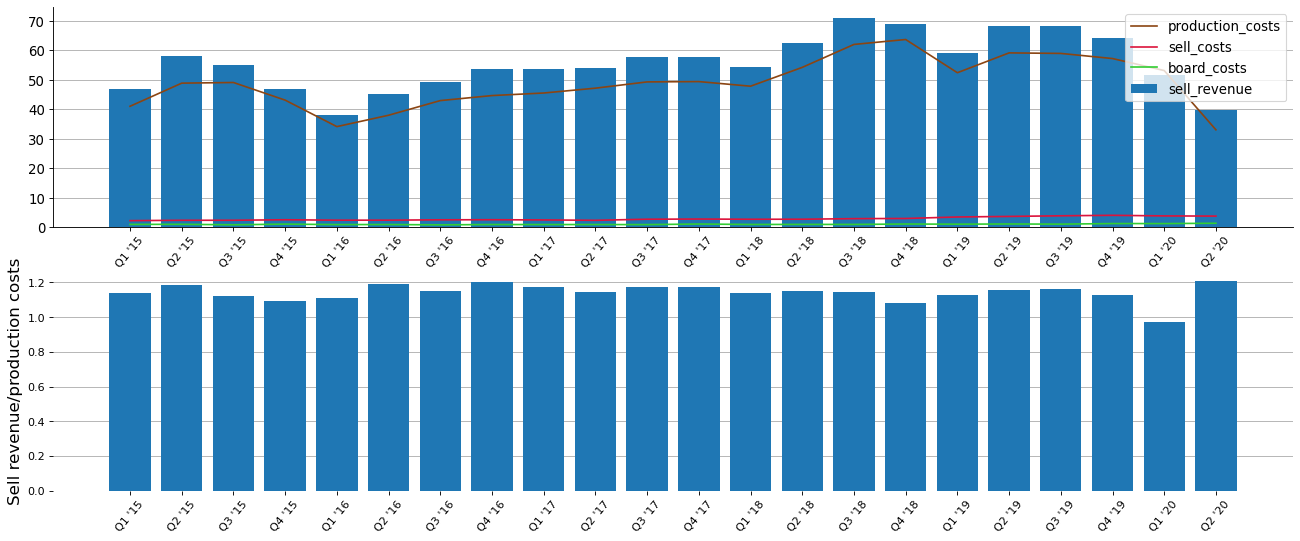

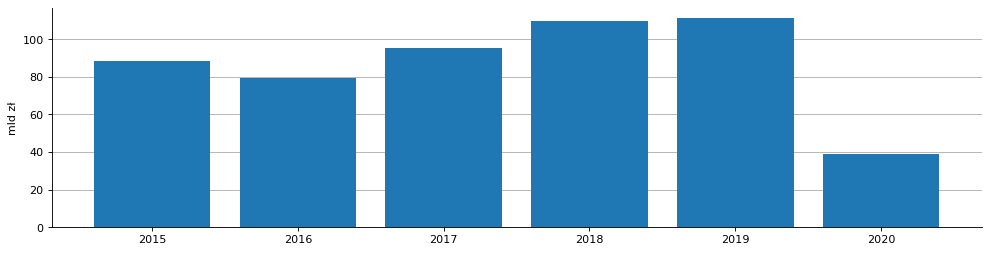

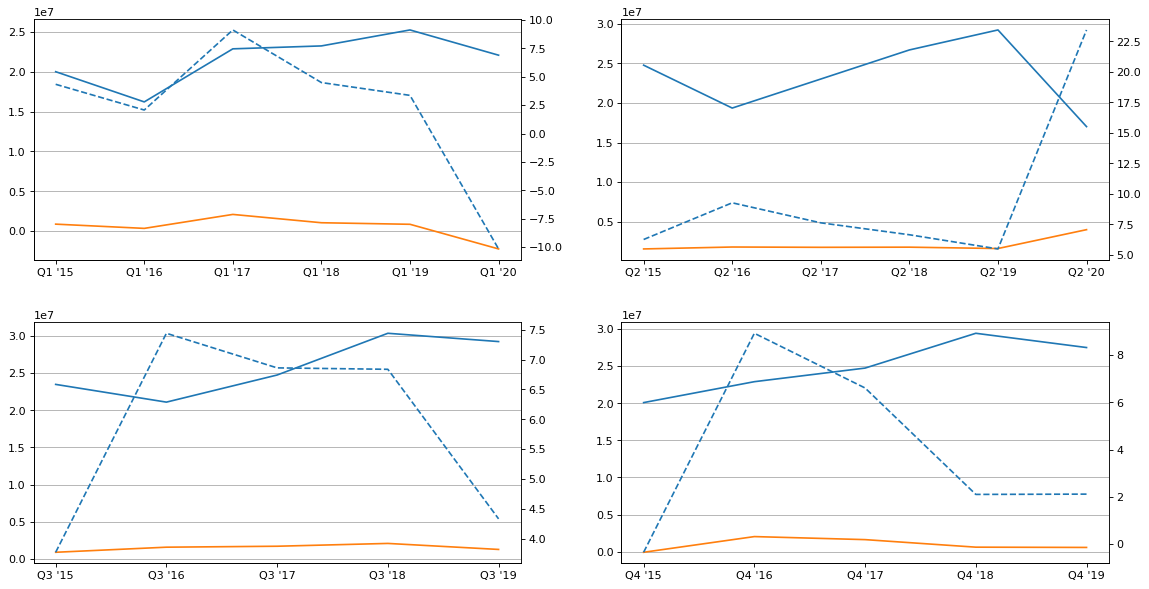

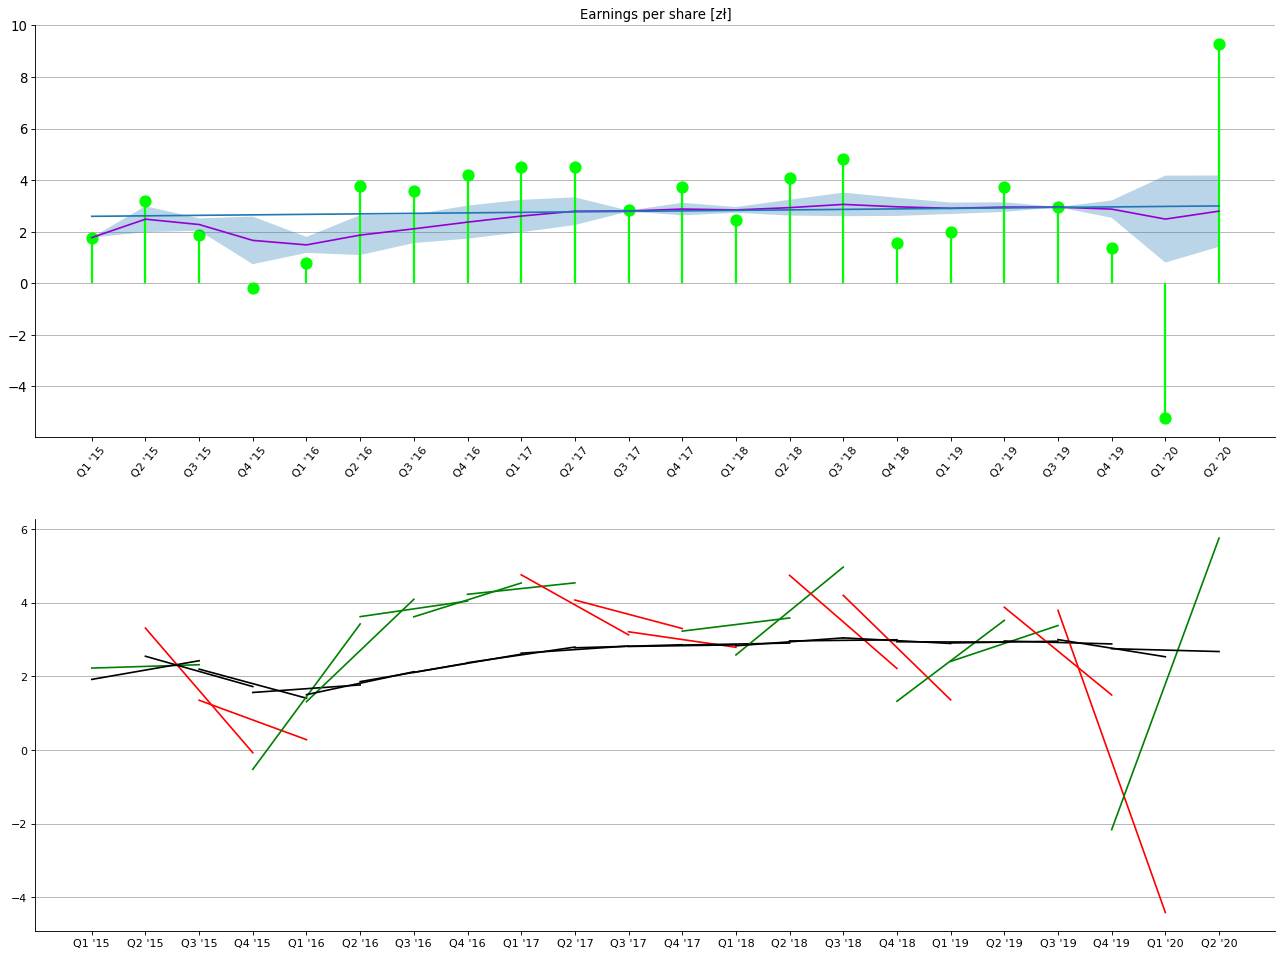

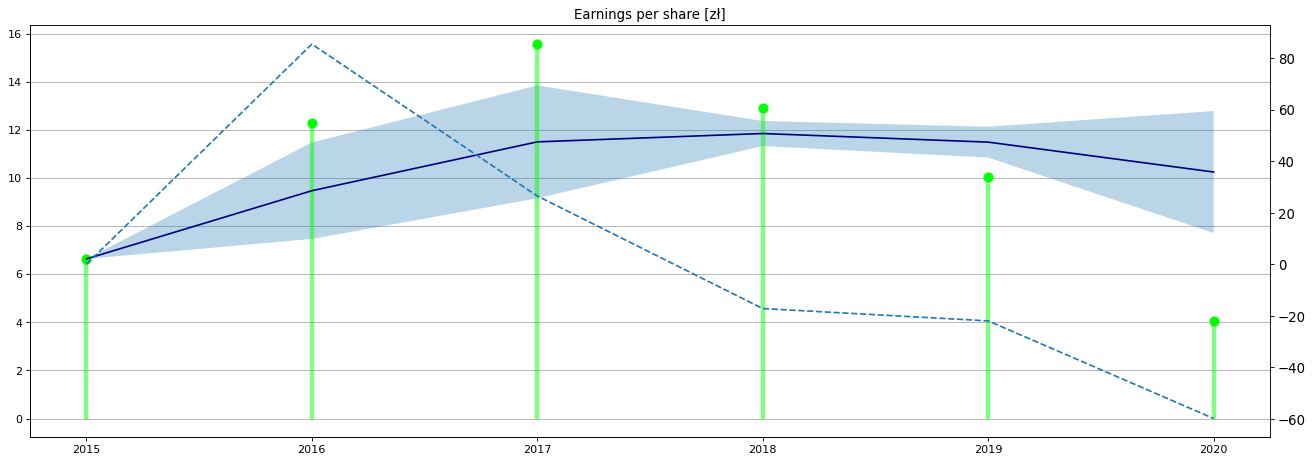

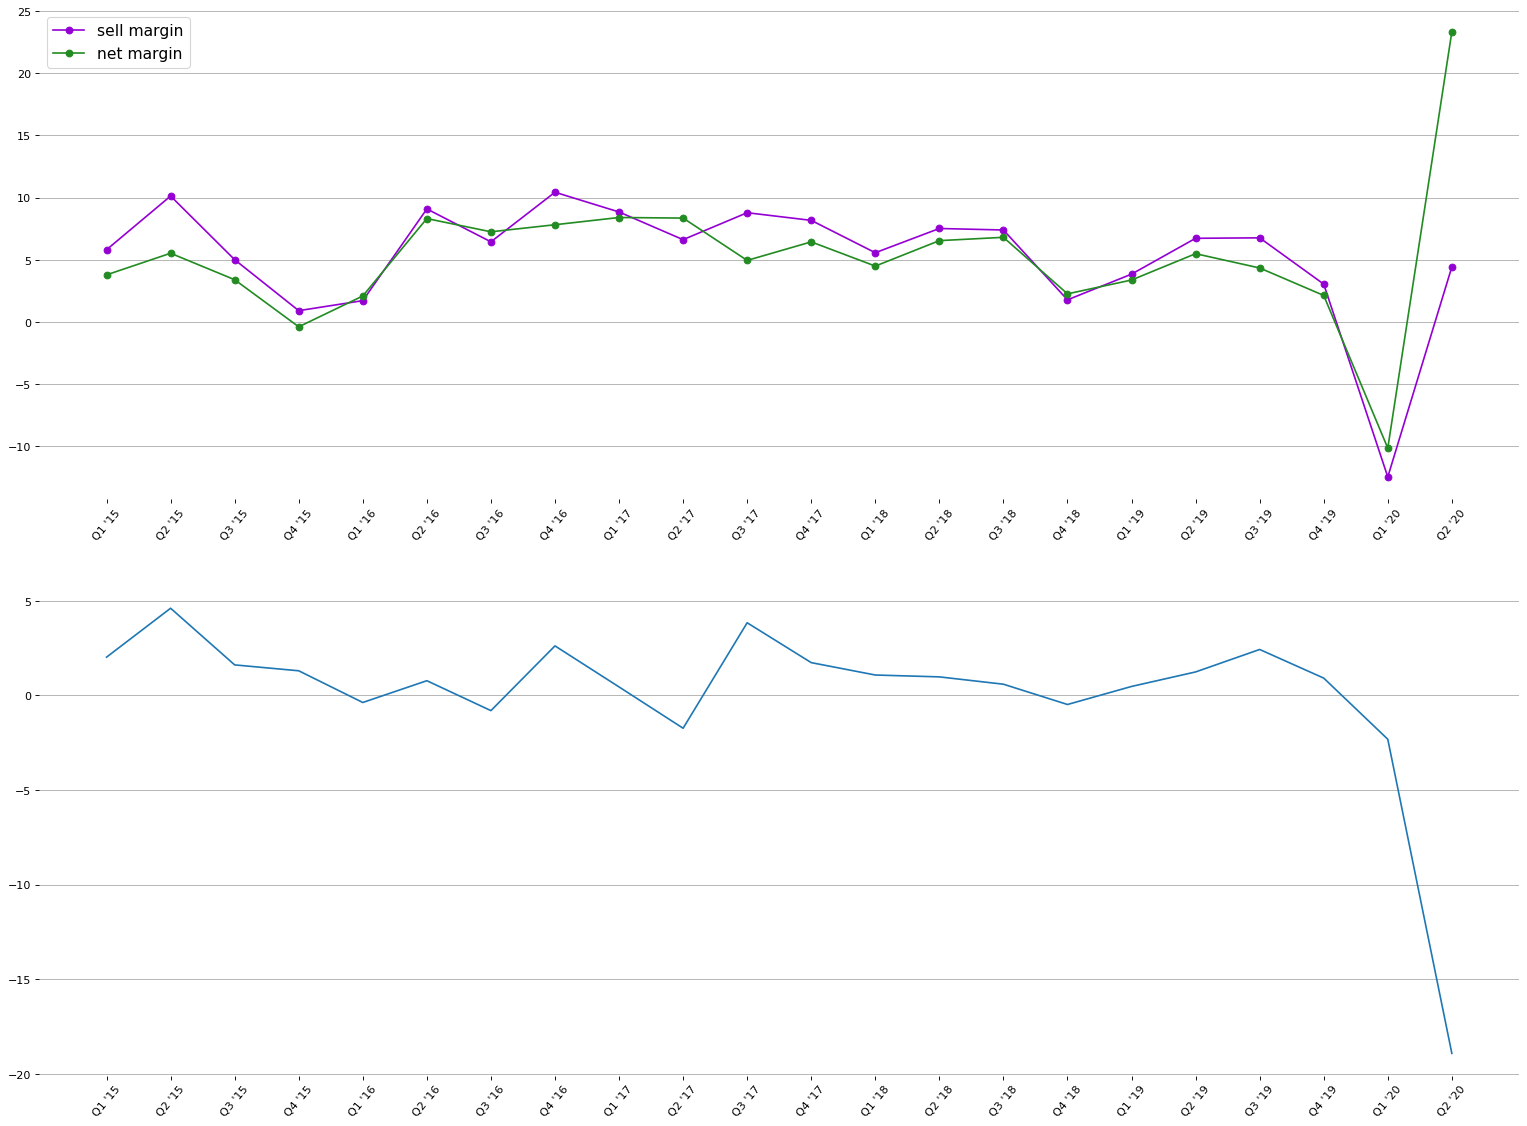

In [4]:
fin = ZIS(time) 
display(fin.Revenue())
display(fin.earnings())
display(fin.earnings_year())
display(fin.margins())